Import

In [13]:
from flask import Flask, request

ModuleNotFoundError: No module named 'flask'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [3]:
from sklearn.preprocessing import StandardScaler

def extract_features(x):
    x=x.loc[:,['verified','statuses','location','date_joined','most_recent_post','following','followers','likes','lists','tweet_language','tweets_this_week','retweet_ratio','retweeted_count','URL works','userNameScore','avg_tweets_by_hour_of_day','avg_tweets_by_day_of_week']]
    return x

data = pd.read_csv('./Data/featuresfloatv2.csv')
data=data.loc[:,['verified','statuses','location','date_joined','most_recent_post','following','followers','likes','lists','tweet_language','tweets_this_week','retweet_ratio','retweeted_count','URL works','userNameScore','avg_tweets_by_hour_of_day','avg_tweets_by_day_of_week','fake_follower','account_type']]

# Create an instance of StandardScaler
scaler = StandardScaler()
x=extract_features(data)
# Fit the scaler to your data
scaler.fit(x)

# Transform your data using the scaler
X_scaled = scaler.transform(x)
y = data.account_type.values.tolist()

In [4]:


x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Train the Suppport Vector Machines model

In [5]:
svc =  LinearSVC() 
svc.fit(x_train,y_train)

y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))


Training Accuracy score: 0.8117495869285846
Testing Accuracy score: 0.8079013070935527


/home/chams/Documents/Module-de-decision-IA/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Calculate the accuracy of the model

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,  y_pred_test)


0.8076075782053165

/home/chams/Documents/Module-de-decision-IA/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Training Accuracy score: 0.8119331742243436
Testing Accuracy score: 0.8076075782053165
classification_report 
               precision    recall  f1-score   support

         bot       0.73      0.68      0.70      2283
       human       0.84      0.87      0.86      4526

    accuracy                           0.81      6809
   macro avg       0.79      0.78      0.78      6809
weighted avg       0.80      0.81      0.81      6809



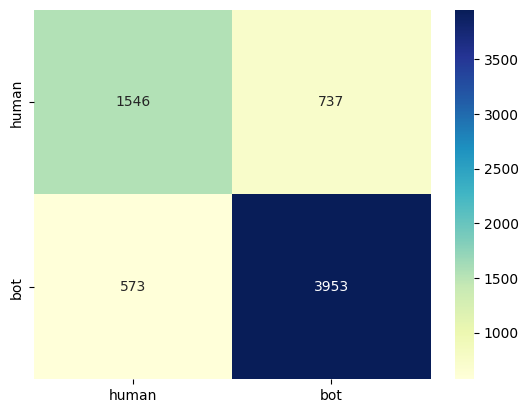

In [10]:
svc =  LinearSVC() 
svc.fit(x_train,y_train)

y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm, columns=[ 'human', 'bot'], 
                        index=[ 'human', 'bot'])
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
